In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
from sklearn.metrics import r2_score as r2

In [196]:
var_norm = 'CO'
var = 'CO'
unit = 'ppm'

In [197]:
model = 'LSTM'

In [198]:
df = pd.read_excel('{} r2.xlsx'.format(var_norm))

In [199]:
df

,Obs,Pred
0,2.477138,2.003491
1,1.869422,2.325649
2,1.493166,2.119479
3,1.737215,2.008809
4,2.676190,2.347832
...,...,...
294,2.691818,1.668484
295,2.297184,3.032918
296,2.914991,2.324573
297,3.136044,2.474819


In [200]:
r2s = r2(df['Obs'], df['Pred'])

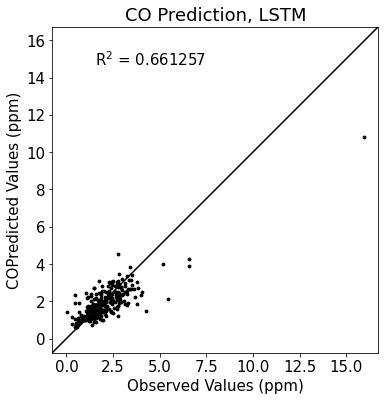

In [201]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['font.family'] = 'Lato'
fig, ax = plt.subplots(figsize = (6,6))
ax.scatter(df['Obs'], df['Pred'], s= 8, color = 'k')
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-')
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_xlabel('Observed Values ({})'.format(unit))
ax.set_ylabel(var + 'Predicted Values ({})'.format(unit))
ax.set_title('{} Prediction, {}'.format(var,model))
ax.text(0.3, 0.9, str('R$^2$ = ' + str(round(r2s,6))),
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)
fig.savefig('{}.png'.format(var_norm), dpi=150)